In [26]:
import numpy as np
import keras as k
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dropout,Input, Dense,merge, Add
from keras import optimizers
from keras.models import Model
import pandas as pd

In [27]:
random_ = np.loadtxt("./series/random.txt")
green_ = np.loadtxt("./series/green.txt")

In [35]:
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_[:,0]
X["beta"] = random_[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_[:,0]
Y["damu"] = green_[:,1]
Y["dbeta"] = green_[:,2]

In [57]:
Y.median(axis = 0)

G       -0.001727
damu     0.013334
dbeta    0.010205
dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [38]:
# scaler = Pre()
random_scale = preprocessing.MinMaxScaler([0,5])
green_scale = preprocessing.MinMaxScaler([0,5])

random_scale.fit(X_train)
green_scale.fit(y_train)
X_train = random_scale.transform(X_train)
X_test = random_scale.transform(X_test)

y_train = green_scale.transform(y_train)
y_test = green_scale.transform(y_test)

In [39]:
Y1,Y2,Y3 =y_train[:,0],y_train[:,1],y_train[:,2]
Y1_,Y2_,Y3_ =y_test[:,0],y_test[:,1],y_test[:,2]

In [40]:
Y1,Y2,Y3 = Y1.reshape(Y1.size,1),Y2.reshape(Y2.size,1),Y3.reshape(Y3.size,1)
Y1_,Y2_,Y3_ = Y1_.reshape(Y1_.size,1),Y2_.reshape(Y2_.size,1),Y3_.reshape(Y3_.size,1)

In [42]:
inputs = Input(shape=(2,))
x = Dense(8, activation='tanh')(inputs)
x = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)
x_1 = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x_1)
# x = Dense(64, activation='relu')(x)




x1_ = Dense(64, activation='tanh')(x)
x1 = Dense(64, activation='tanh')(x1_)
x1 = Dense(64, activation='tanh')(x1)
x1 = Dense(64, activation='tanh')(x1)
x1 = Dense(64, activation='tanh')(x1)
# x = Dense(64, activation='relu')(x)
x1 = Add()([x1, x1_])
x1 = Dense(64, activation='tanh')(x)
y1 = Dense(1, activation=None)(x1)

x2_ = Dense(64, activation='tanh')(x)
x2 = Dense(64, activation='tanh')(x2_)
x2 = Dense(64, activation='tanh')(x2)
x2 = Dense(64, activation='tanh')(x2)
x2 = Dense(64, activation='tanh')(x2)
x2 = Dense(64, activation='tanh')(x2)
# x = Dense(64, activation='relu')(x)
x2 = Add()([x2, x2_])
y2 = Dense(1, activation=None)(x2)

x3 = Dense(32, activation='tanh')(x)
x3 = Dense(10, activation='tanh')(x3)
y3 = Dense(1, activation=None)(x3)

model = Model(inputs=inputs, outputs=[y1,y2,y3])


In [43]:
sgd = optimizers.adam(lr=0.0001)


In [44]:
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(time_decay,verbose=1)

In [45]:
model.compile(loss=['mean_squared_error','mean_squared_error','mean_squared_error'], optimizer=sgd, metrics=['mean_absolute_percentage_error'],)


In [46]:
history = model.fit([X_train], [Y1,Y2,Y3], epochs=40, batch_size=32,validation_data=([X_test],[Y1_,Y2_,Y3_]),callbacks=[lrate])

Train on 49749 samples, validate on 21322 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
49749/49749 [==============================] - 15s 294us/step - loss: 0.3575 - dense_36_loss: 0.2070 - dense_43_loss: 0.0804 - dense_46_loss: 0.0701 - dense_36_mean_absolute_percentage_error: 48121.4052 - dense_43_mean_absolute_percentage_error: 16557.0958 - dense_46_mean_absolute_percentage_error: 46586.9814 - val_loss: 0.1624 - val_dense_36_loss: 0.0902 - val_dense_43_loss: 0.0409 - val_dense_46_loss: 0.0313 - val_dense_36_mean_absolute_percentage_error: 13.4531 - val_dense_43_mean_absolute_percentage_error: 13.1375 - val_dense_46_mean_absolute_percentage_error: 12.0512
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641112e-05.
49749/49749 [==============================] - 11s 222us/step - loss: 0.1596 - dense_36_loss: 0.0892 - dense_43_loss: 0.0394 - dense_46_loss: 0.0310 - dense_36_mean_absolute_percent

49749/49749 [==============================] - 12s 246us/step - loss: 0.1467 - dense_36_loss: 0.0782 - dense_43_loss: 0.0380 - dense_46_loss: 0.0305 - dense_36_mean_absolute_percentage_error: 49431.0735 - dense_43_mean_absolute_percentage_error: 46961.5791 - dense_46_mean_absolute_percentage_error: 45821.2071 - val_loss: 0.1470 - val_dense_36_loss: 0.0760 - val_dense_43_loss: 0.0402 - val_dense_46_loss: 0.0308 - val_dense_36_mean_absolute_percentage_error: 11.7501 - val_dense_43_mean_absolute_percentage_error: 12.7899 - val_dense_46_mean_absolute_percentage_error: 11.5909
Epoch 14/40

Epoch 00014: LearningRateScheduler setting learning rate to 9.13389170655442e-05.
49749/49749 [==============================] - 12s 248us/step - loss: 0.1433 - dense_36_loss: 0.0751 - dense_43_loss: 0.0377 - dense_46_loss: 0.0304 - dense_36_mean_absolute_percentage_error: 51184.5140 - dense_43_mean_absolute_percentage_error: 47445.8947 - dense_46_mean_absolute_percentage_error: 46432.5868 - val_loss: 0.1

49749/49749 [==============================] - 13s 269us/step - loss: 0.0546 - dense_36_loss: 0.0286 - dense_43_loss: 0.0047 - dense_46_loss: 0.0213 - dense_36_mean_absolute_percentage_error: 38336.9047 - dense_43_mean_absolute_percentage_error: 39010.4090 - dense_46_mean_absolute_percentage_error: 56650.0648 - val_loss: 0.0527 - val_dense_36_loss: 0.0280 - val_dense_43_loss: 0.0043 - val_dense_46_loss: 0.0204 - val_dense_36_mean_absolute_percentage_error: 6.7114 - val_dense_43_mean_absolute_percentage_error: 5.0403 - val_dense_46_mean_absolute_percentage_error: 12.3929
Epoch 38/40

Epoch 00038: LearningRateScheduler setting learning rate to 4.993871400193846e-05.
49749/49749 [==============================] - 13s 270us/step - loss: 0.0522 - dense_36_loss: 0.0279 - dense_43_loss: 0.0037 - dense_46_loss: 0.0206 - dense_36_mean_absolute_percentage_error: 39475.0744 - dense_43_mean_absolute_percentage_error: 17863.0592 - dense_46_mean_absolute_percentage_error: 56033.3056 - val_loss: 0.05

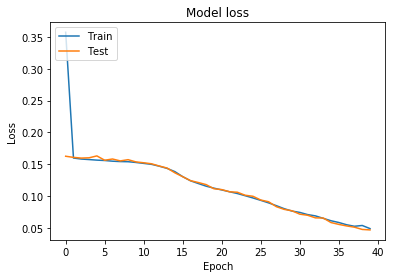

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [49]:
input_ = random_scale.transform(X)
output_ = model.predict(input_)

In [50]:
output_ = np.transpose(np.array(output_))
output_ = green_scale.inverse_transform(output_.reshape(output_.shape[1],3))


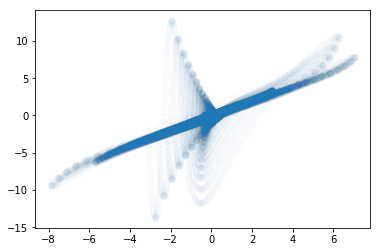

In [54]:
plt.scatter(output_[:,0],green_[:,0],alpha=0.01)

In [52]:
Y.max(axis = 0)

G         12.772139
damu      69.942667
dbeta    325.809673
dtype: float64

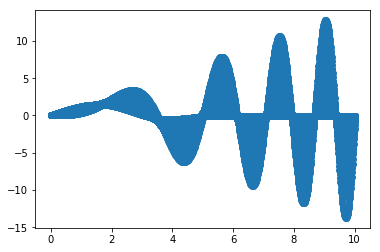

In [76]:
plt.scatter(X['beta'][0:71071],Y["G"][0:71071])

In [2]:
random_filon = np.loadtxt("./Filon/random.txt")
green_filon = np.loadtxt("./Filon/green.txt")


In [6]:
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_filon[:,0]
X["beta"] = random_filon[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_filon[:,0]
Y["damu"] = green_filon[:,1]
Y["dbeta"] = green_filon[:,2]

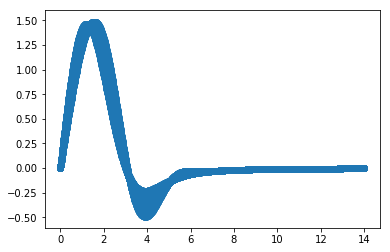

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X['beta'][0:40629],Y["G"][0:40629])

In [23]:
random_filon = np.loadtxt("./asy/random.txt")
green_filon = np.loadtxt("./asy/green.txt")
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_filon[:,0]
X["beta"] = random_filon[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_filon[:,0]
Y["damu"] = green_filon[:,1]
Y["dbeta"] = green_filon[:,2]


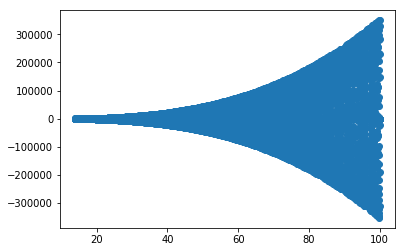

In [25]:
plt.scatter(X['beta'][0:851499],Y["dbeta"][0:851499])

In [14]:
random_filon = np.loadtxt("./Bessel/random.txt")
green_filon = np.loadtxt("./Bessel/green.txt")
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_filon[:,0]
X["beta"] = random_filon[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_filon[:,0]
Y["damu"] = green_filon[:,1]
Y["dbeta"] = green_filon[:,2]


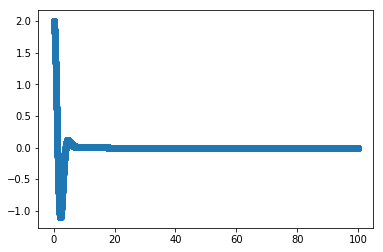

In [20]:
plt.scatter(X['beta'][0:30003],Y["damu"][0:30003])

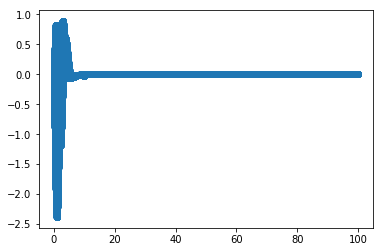

In [22]:
plt.scatter(X['beta'][0:30003],Y["dbeta"][0:30003])